<a href="https://colab.research.google.com/github/bantee-sharma/Primetrade.AI---Assignment/blob/main/Primetrade_AI_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Download Trader Data
!gdown 1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs

Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: /content/historical_data.csv
100% 47.5M/47.5M [00:02<00:00, 21.2MB/s]


In [8]:
# Download Fear-Greed Index
!gdown 1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf

Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: /content/fear_greed_index.csv
100% 90.8k/90.8k [00:00<00:00, 45.5MB/s]


In [88]:
trades_df = pd.read_csv("historical_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")

In [89]:
trades_df.head(1)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.0,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12


In [90]:
sentiment_df.head(1)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01


In [91]:
# shape of data
print("trades_df_shape: ",trades_df.shape)
print("sentimant_df_shape: ",sentiment_df.shape)

trades_df_shape:  (211224, 16)
sentimant_df_shape:  (2644, 4)


In [92]:
# Checking missing value
print("Missing dates in sentiment:", sentiment_df.isna().sum())
print("Missing timestamps in trades:", trades_df.isna().sum())

Missing dates in sentiment: timestamp         0
value             0
classification    0
date              0
dtype: int64
Missing timestamps in trades: Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [93]:
trades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [94]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [95]:
# Checking duplicate values
print(trades_df.duplicated().sum())
print(sentiment_df.duplicated().sum())

0
0


In [96]:
# Convert sentiment 'date' to datetime
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Convert trades 'Timestamp IST' to datetime
trades_df['Timestamp IST'] = pd.to_datetime(trades_df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')


# Extract just date (remove time component)
trades_df['date'] = trades_df['Timestamp IST'].dt.normalize()

In [103]:
# Merge trades with sentiment classification
merged_df = pd.merge(trades_df, sentiment_df[['date', 'classification']], on='date', how='left')

In [107]:
# PnL Summary by Sentiment
merged_df.groupby('classification')['Closed PnL'].describe()

,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
Extreme Fear,21400.0,34.537862,1136.056091,-31036.69194,0.0,0.0,5.635032,115287.00000
Extreme Greed,39992.0,67.892861,766.828294,-10259.46800,0.0,0.0,10.028709,44223.45187
Fear,61837.0,54.290400,935.355438,-35681.74723,0.0,0.0,5.590856,135329.09010
Greed,50303.0,42.743559,1116.028390,-117990.10410,0.0,0.0,4.944105,74530.52371
Neutral,37686.0,34.307718,517.122220,-24500.00000,0.0,0.0,3.995795,48504.09555


In [141]:
# creating  Leverage
merged_df['Leverage'] = merged_df['Size USD'] / (merged_df['Size Tokens'] * merged_df['Execution Price'])

In [142]:
#  Leverage Analysis
merged_df.groupby('classification')['Leverage'].describe()

,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
Extreme Fear,21400.0,1.000032,0.004748,0.963656,0.999999,1.0,1.000002,1.691475
Extreme Greed,39992.0,0.999743,0.018195,0.000000,0.999997,1.0,1.000003,1.658925
Fear,61837.0,0.999815,0.013593,0.000000,0.999998,1.0,1.000002,1.215491
Greed,50303.0,0.999620,0.020447,0.000000,0.999998,1.0,1.000003,1.860349
Neutral,37686.0,1.000001,0.001390,0.821828,0.999998,1.0,1.000003,1.126126


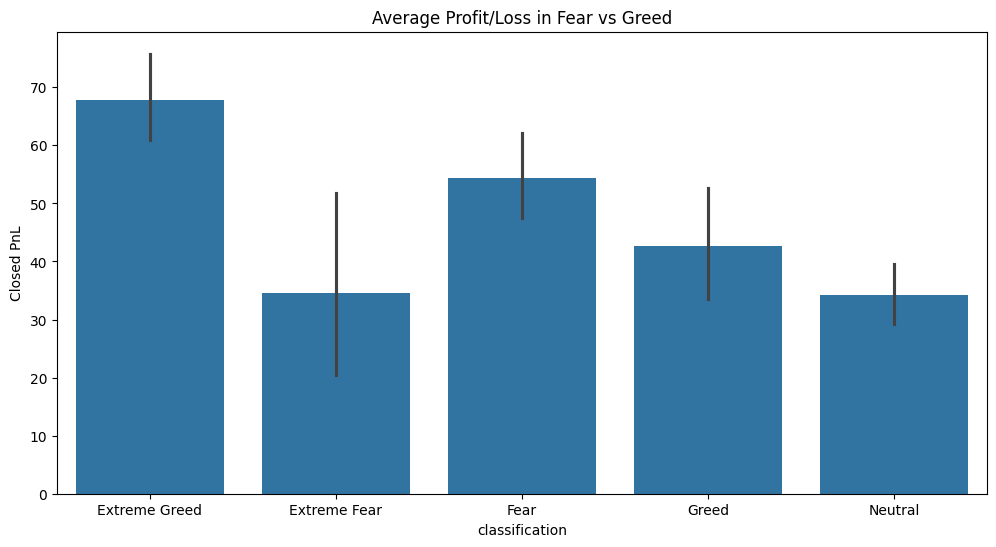

In [116]:
# Bar Plot: Average PnL per Sentiment
plt.figure(figsize=(12,6))
sns.barplot(data=merged_df, x = "classification",  y = "Closed PnL",estimator='mean')
plt.title('Average Profit/Loss in Fear vs Greed')
plt.ylabel('Closed PnL')
plt.show()

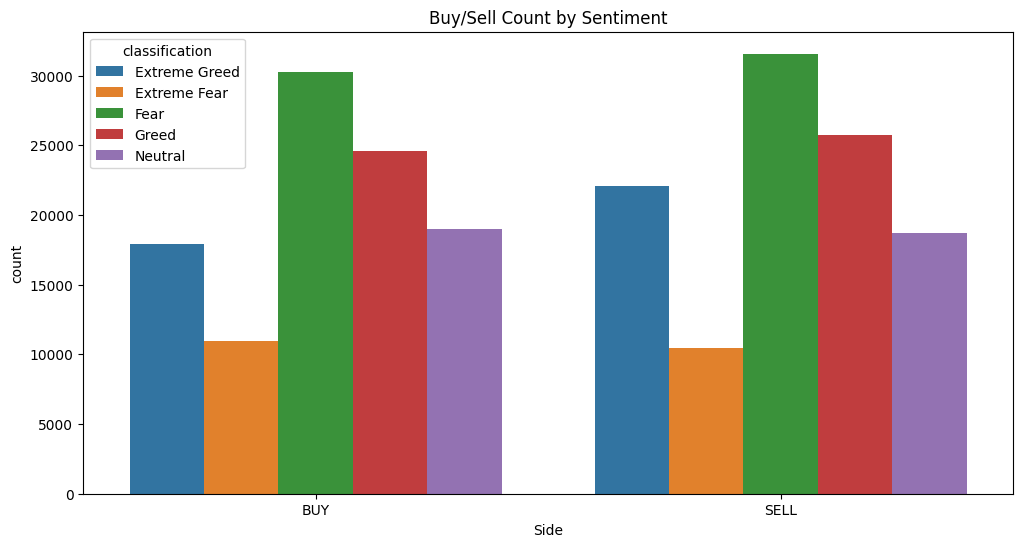

In [144]:
# Side Distribution (Buy vs Sell in Fear/Greed)
plt.figure(figsize=(12,6))
sns.countplot(data=merged_df, x='Side', hue='classification')
plt.title('Buy/Sell Count by Sentiment')
plt.show()

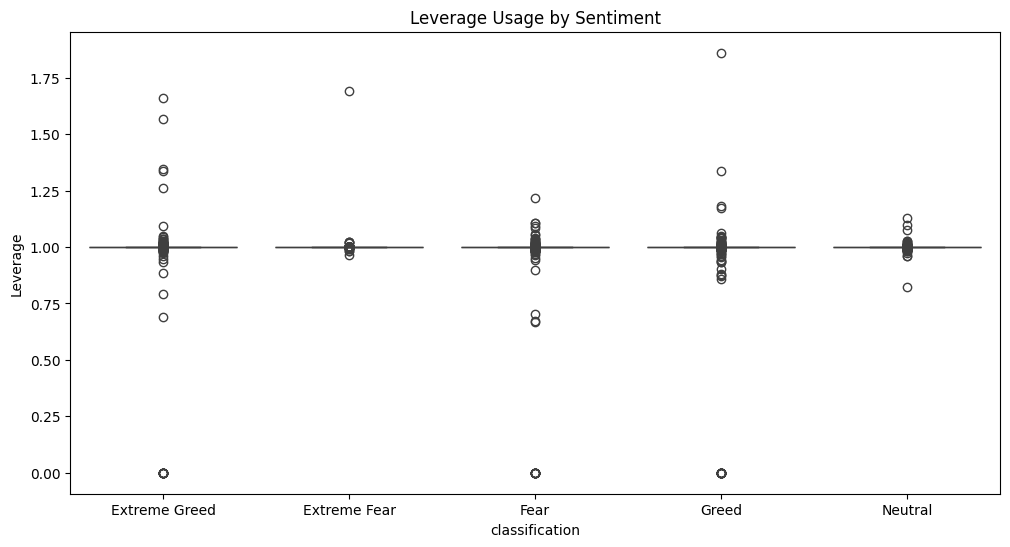

In [146]:
# # Box Plot: Leverage Usage by Sentiment
plt.figure(figsize=(12,6))
sns.boxplot(data=merged_df, x='classification', y='Leverage')
plt.title('Leverage Usage by Sentiment')
plt.show()

In [154]:
merged_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification,Leverage
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed,1.000000
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed,1.000000
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed,0.999999
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed,1.000001
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed,1.000036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,2025-04-25 15:35:00,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,2025-04-25,Greed,0.999995
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,2025-04-25 15:35:00,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,2025-04-25,Greed,0.999998
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,2025-04-25 15:35:00,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,2025-04-25,Greed,0.999993
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,2025-04-25 15:35:00,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,2025-04-25,Greed,1.000000


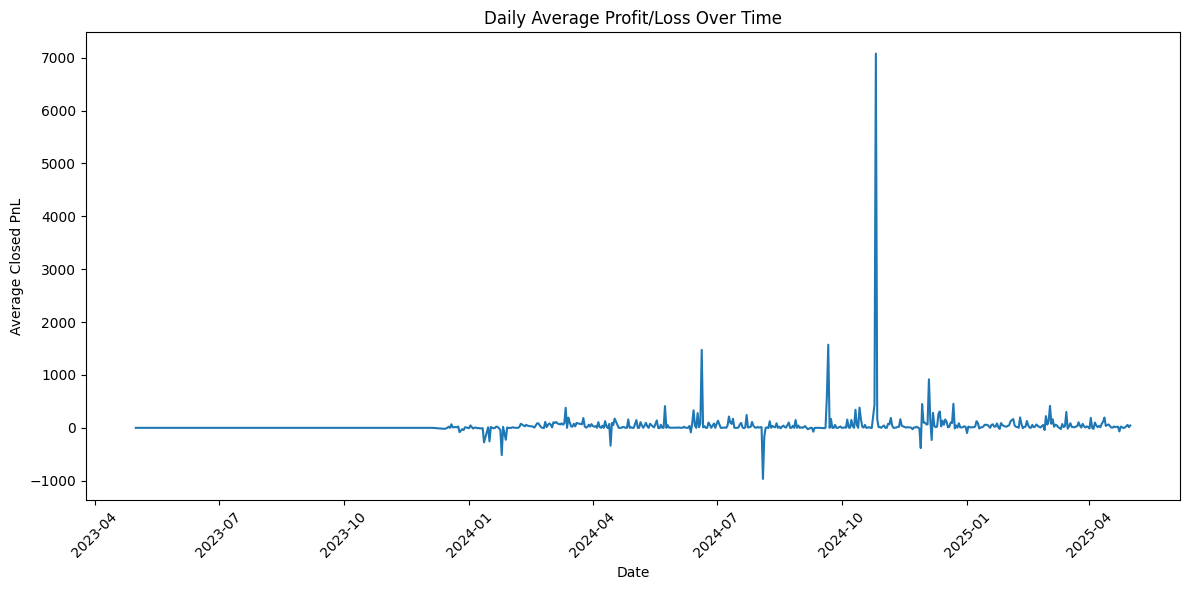

In [156]:
# Daily Line Plot of Avg PnL Over Time
daily_avg_pnl = merged_df.groupby("date")["Closed PnL"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_avg_pnl, x="date", y="Closed PnL")
plt.title("Daily Average Profit/Loss Over Time")
plt.xlabel("Date")
plt.ylabel("Average Closed PnL")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
